<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *8*: *Clustering***

###**Tenggat Waktu: XX Bulan 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [56]:
# Isi dengan data diri Anda
NAMA = "Jeremy Mervin"
KELAS = "E"
NPM = "2106654675"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2" ,
             "https://medium.com/@Suraj_Yadav/understanding-intra-cluster-distance-inter-cluster-distance-and-dun-index-a-comprehensive-guide-a8de726f5769"]

In [57]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Jeremy Mervin dari kelas E dengan NPM 2106654675, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Jeremy Mervin)


# Deskripsi Dataset

Penjelasan dataset:

1. **mcg**: McGeoch's method for signal sequence recognition.
2. **gvh**: von Heijne's method for signal sequence recognition.
3. **lip**: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
4. **chg**: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
5. **aac**: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. **alm1**: score of the ALOM membrane spanning region prediction program.
7. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

Dataset source: https://archive.ics.uci.edu/dataset/39/ecoli

In [58]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

# **Preparing Dataset**

In [59]:
# TODO: Open your dataset

df = pd.read_csv("ecoli.csv")
df

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,8
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,8
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,8
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,8


# **Clustering**

### **Pengertian**

**Pengelompokan atau *clustering***, yang merupakan bagian dari unsupervised learning, melibatkan proses mengelompokkan sejumlah titik data ke dalam beberapa kelompok atau klaster sedemikian rupa sehingga objek dalam klaster yang sama memiliki tingkat kemiripan yang tinggi, sementara objek dalam klaster yang berbeda memiliki tingkat kemiripan yang rendah. Berbeda dengan supervised learning, clustering tidak memerlukan label yang terkait dengan setiap objek; sebaliknya, tujuannya adalah untuk menemukan pola dalam data, yang mungkin ada atau mungkin juga tidak (data mungkin tidak memiliki klaster yang jelas). Penting untuk dicatat bahwa algoritma pengelompokan tidak menjelaskan secara eksplisit makna dari setiap klaster, sehingga Anda perlu menginterpretasikannya sendiri, mungkin dengan melakukan visualisasi seperti yang akan dibahas dalam sesi lab kali ini.

### **Motivasi**

Motivasi dari _unsupervised learning_ adalah untuk mengungkap pola, struktur, dan wawasan yang mungkin tersembunyi dalam data tanpa adanya petunjuk atau label yang jelas. Berikut adalah beberapa alasan mengapa _unsupervised learning_ sangat penting dan memiliki motivasi yang kuat:

1. **Penemuan Pola Tersembunyi**: Seringkali, data dunia nyata tidak selalu dilengkapi dengan label yang menjelaskan apa yang ada di dalamnya. Dalam banyak kasus, kita mungkin tidak tahu apa yang harus dicari atau apa yang mungkin ada dalam data. _Unsupervised learning_ memungkinkan kita untuk mengeksplorasi data dan menemukan pola atau struktur yang mungkin tersembunyi, tanpa harus memiliki pengetahuan sebelumnya tentang apa yang harus dicari.

2. **Segmentasi Data**: _Unsupervised learning_ memungkinkan kita untuk mengelompokkan data ke dalam kelompok atau klaster yang memiliki karakteristik atau kemiripan tertentu. Contohnya, dalam analisis pelanggan, kita dapat mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku atau preferensi mereka. Ini dapat membantu perusahaan dalam mengarahkan strategi pemasaran yang lebih efektif.

3. **Ekstraksi Fitur**: Algoritma _unsupervised learning_ dapat digunakan untuk mengekstraksi fitur-fitur penting dari data. Ini bermanfaat dalam mereduksi dimensi data, mengurangi kebisingan, atau mengungkapkan karakteristik yang relevan dalam dataset yang besar. Contohnya, dalam pengolahan citra, kita dapat menggunakan _dimensionality reduction_ untuk mengurangi jumlah fitur yang tidak relevan.

4. **Anomali Detection**: _Unsupervised learning_ juga dapat digunakan untuk mendeteksi anomali dalam data. Ini berguna dalam kasus di mana kita mencoba menemukan data yang tidak biasa atau data yang tidak mengikuti pola mayoritas. Misalnya, dalam keamanan jaringan, kita dapat menggunakan _unsupervised learning_ untuk mendeteksi serangan siber yang tidak biasa.

5. **Preprocessing Data**: _Unsupervised learning_ sering digunakan sebagai tahap awal dalam analisis data sebelum kita beralih ke metode _supervised learning_. Ini termasuk membersihkan data, mengisi data yang hilang, atau mengurangi dimensi data sebelum melatih model prediksi.

6. **Penelitian Ilmiah dan Penemuan Baru**: Dalam beberapa kasus, _unsupervised learning_ digunakan dalam penelitian ilmiah untuk menemukan wawasan baru dalam data. Contohnya, dalam bidang ilmu genetika, analisis _unsupervised learning_ dapat membantu mengungkap pola baru dalam ekspresi gen atau perbedaan dalam populasi.

Dalam rangkaian kasus di atas, _unsupervised learning_ memberikan cara untuk mengungkap dan memahami data yang mungkin sulit dipahami atau dianalisis dengan metode lain. Ini membuatnya menjadi alat yang kuat dalam berbagai bidang, termasuk ilmu data, kecerdasan buatan, pengolahan bahasa alami, penglihatan komputer, dan banyak lagi.

### **Jenis-jenis Algoritma**

Ada banyak algoritma _clustering_ yang digunakan untuk mengelompokkan data dalam berbagai konteks. Berikut beberapa algoritma _clustering_ yang umum digunakan:

1. **K-Means**: Algoritma _K-Means_ adalah salah satu algoritma _clustering_ paling populer. Ini membagi data menjadi _K_ kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.

2. **Hierarchical Clustering**: Algoritma _clustering_ hierarki membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai _dendrogram_, yang memungkinkan analisis tingkat hierarki.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritma _DBSCAN_ mengelompokkan data berdasarkan kerapatan. Ini mengidentifikasi kluster sebagai daerah di mana terdapat titik data yang cukup padat, sementara titik yang berada jauh dari kluster dianggap sebagai _noise_.

4. **Agglomerative Clustering**: Ini adalah pendekatan hierarkis untuk pengelompokan di mana setiap titik data dianggap sebagai kluster tunggal dan kemudian secara berurutan menggabungkan kluster yang paling dekat satu sama lain hingga satu kluster besar terbentuk.

Pilihan algoritma _clustering_ bergantung pada karakteristik data dan tujuan analisis. Setiap algoritma memiliki kelebihan dan kelemahan yang harus dipertimbangkan sesuai dengan kebutuhan Anda.

Pada lab kali ini kita hanya akan membahas atau menggunakan beberapa algoritma yang dijelaskan pada slide yang tersedia yakni **K-Means** dan **Hierarchical**

# **Latihan Soal Praktis** [70]

**Prapemrosesan data:**
Sebelum menjalankan algoritma clustering, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan pre-processing pada data agar siap digunakan untuk clustering menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

- Handle missing value: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan missing value tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
- Handle outliers: Algoritma K-Means sangat sensitif terhadap outliers (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle outliers dengan heuristics tertentu (misalnya dengan metode capping).
- Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan StandardScaler).
- Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan LabelEncoder), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti K-Prototypes, tetapi hal tersebut di luar scope lab ini).

In [60]:
# TODO: Do the inspection on the dataset and preprocess it

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   class   336 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 21.1 KB


In [61]:
# Check data duplicates

print("Jumlah duplikasi data : " + str(df.duplicated().sum()))

Jumlah duplikasi data : 0


In [62]:
# Check outlier

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = dict(check_outlier(df).sum())

Outlier pada tiap atribut:
mcg       0
gvh      13
lip      10
chg       1
aac       9
alm1      0
alm2      0
class     0
dtype: int64


Terdapat cukup banyak outlier pada kolom "lip", maka drop.

In [63]:
df = df.drop(columns=["lip"])
df

,mcg,gvh,chg,aac,alm1,alm2,class
0,0.49,0.29,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.5,0.55,0.25,0.35,1
...,...,...,...,...,...,...,...
331,0.74,0.56,0.5,0.47,0.68,0.30,8
332,0.71,0.57,0.5,0.48,0.35,0.32,8
333,0.61,0.60,0.5,0.44,0.39,0.38,8
334,0.59,0.61,0.5,0.42,0.42,0.37,8


In [64]:
# Standarization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in df.columns:
  df[[i]] = scaler.fit_transform(df[[i]])

df

,mcg,gvh,chg,aac,alm1,alm2,class
0,-0.051761,-1.419531,-0.054636,0.490781,-1.207717,-0.716084,-0.812457
1,-2.212876,-0.675967,-0.054636,0.327106,-0.697111,-0.285665,-0.812457
2,0.308424,-0.675967,-0.054636,-0.082081,-0.604273,-0.190016,-0.812457
3,0.462790,-0.067597,-0.054636,0.163431,-0.232923,-0.668259,-0.812457
4,-1.389594,-1.216741,-0.054636,0.408944,-1.161299,-0.716084,-0.812457
...,...,...,...,...,...,...,...
331,1.234617,0.405580,-0.054636,-0.245756,0.834709,-0.955205,1.837888
332,1.080251,0.473177,-0.054636,-0.163918,-0.697111,-0.859557,1.837888
333,0.565700,0.675967,-0.054636,-0.491268,-0.511436,-0.572611,1.837888
334,0.462790,0.743564,-0.054636,-0.654943,-0.372179,-0.620435,1.837888


In [65]:
# TODO: After preprocess the data, select some columns for clustering and assign it as X
X = df[['mcg', 'alm2']]
X

,mcg,alm2
0,-0.051761,-0.716084
1,-2.212876,-0.285665
2,0.308424,-0.190016
3,0.462790,-0.668259
4,-1.389594,-0.716084
...,...,...
331,1.234617,-0.955205
332,1.080251,-0.859557
333,0.565700,-0.572611
334,0.462790,-0.620435


## K-Means Clustering [35]

For n_clusters = 2 The average silhouette_coefficient is : 0.44886022759244765
For n_clusters = 3 The average silhouette_coefficient is : 0.4838781196760062
For n_clusters = 4 The average silhouette_coefficient is : 0.48623885478992984
For n_clusters = 5 The average silhouette_coefficient is : 0.42168042197343947
For n_clusters = 6 The average silhouette_coefficient is : 0.42174977322344886
For n_clusters = 7 The average silhouette_coefficient is : 0.4010873348328091
For n_clusters = 8 The average silhouette_coefficient is : 0.3684523972768836


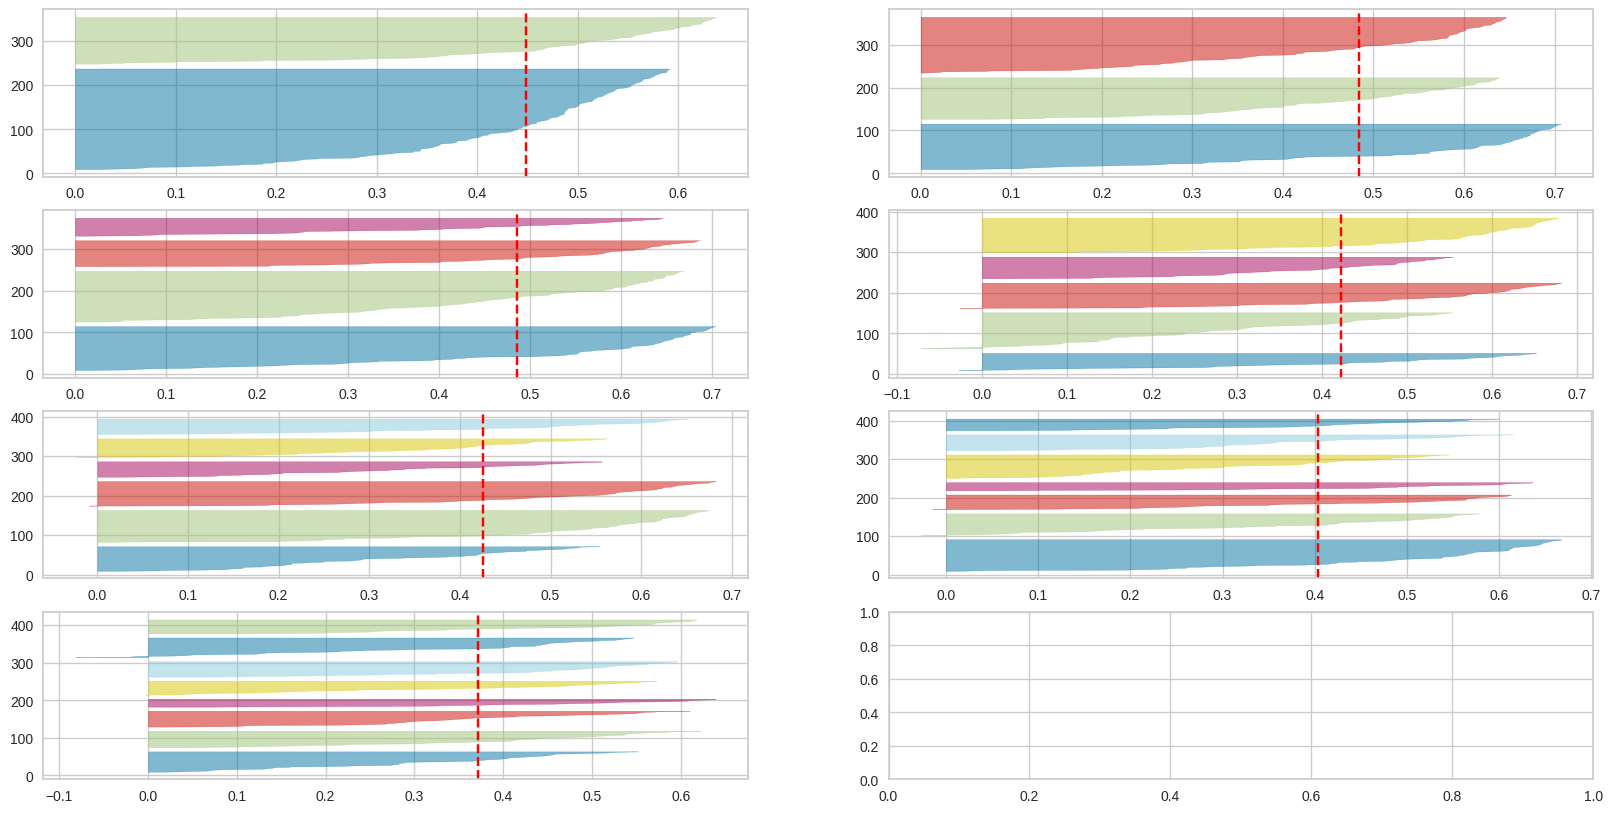

In [66]:
# TODO: Anda dapat menambahkan nilai kemungkinan dari jumlah cluster yang akan dibuat untuk melihat kemungkinan pembentukkan cluster yang lebih baik.
num_of_cluster = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [67]:
# TODO: Anda dapat menyesuaikan nilai dari n_clusters
kmeans = KMeans(n_clusters=2)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('alm2', 'mcg'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,alm2,mcg,Clusters
0,-0.716084,-0.051761,1
1,-0.285665,-2.212876,1
2,-0.190016,0.308424,1
3,-0.668259,0.462790,1
4,-0.716084,-1.389594,1
...,...,...,...
331,-0.955205,1.234617,1
332,-0.859557,1.080251,1
333,-0.572611,0.565700,1
334,-0.620435,0.462790,1


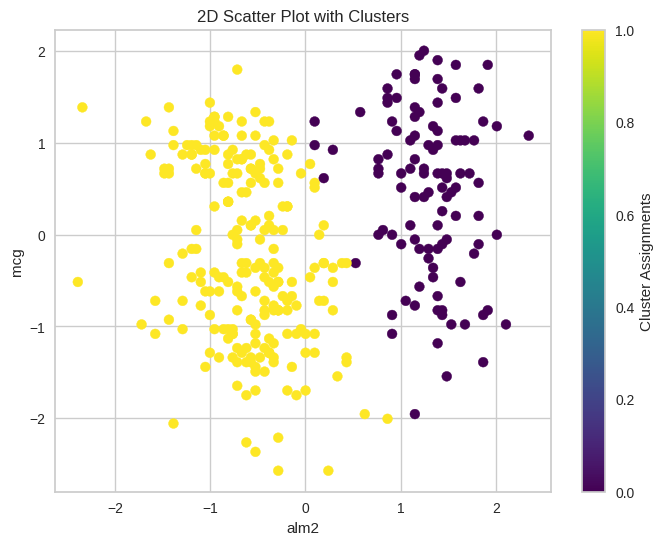

In [68]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.

import matplotlib.pyplot as plt

# Extracting features and cluster assignments
alm2_values = data_with_clusters['alm2']
mcg_values = data_with_clusters['mcg']
cluster_assignment = data_with_clusters['Clusters']

# Create a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(alm2_values, mcg_values, c=cluster_assignment, cmap='viridis', s=50)

# Adding labels to the axes
plt.xlabel('alm2')
plt.ylabel('mcg')
plt.title('2D Scatter Plot with Clusters')

# Adding a color bar to represent cluster assignments
color_bar = plt.colorbar()
color_bar.set_label('Cluster Assignments')

# Show the plot
plt.show()


## Hierarchical Clustering [35]

In [69]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [70]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(X)
clustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([289, 191, 335, 308, 270, 167, 334, 293, 269, 179, 306, 215, 288,
       268, 309, 232, 255, 305, 304, 307, 231, 319, 258, 323, 223, 275,
       328, 204, 259, 266, 182, 332, 196, 330, 285, 267, 227, 286, 333,
       316, 287, 254, 247, 262, 265, 329, 192, 239, 226, 291, 224, 235,
       229, 292, 303, 331, 297, 134, 234, 277, 164, 327, 310, 299, 321,
       320, 236, 206, 264, 222, 168, 302, 240, 180, 278, 185, 200, 207,
       175, 317, 111, 315, 205, 178, 163, 257, 245, 256, 153, 248, 165,
        83, 213, 312, 249, 324, 294, 325, 216, 237, 145, 244, 133, 190,
       195, 242, 177, 225, 263, 198, 241, 157,  97, 189, 193, 127, 282,
       228, 230, 221, 326, 313, 217, 186, 132,  92, 113, 197, 199, 208,
       187, 246, 271, 107, 110, 119, 281, 238, 114, 140, 131, 301, 283,
       214, 184, 233, 171, 300, 112, 210,  99, 166, 284, 173, 253, 194,
       172, 322, 128, 116, 251, 149, 209, 115, 276, 219, 174, 183, 118,
       201, 181, 137,  65,  98, 126, 188, 218, 220, 279,  96, 29

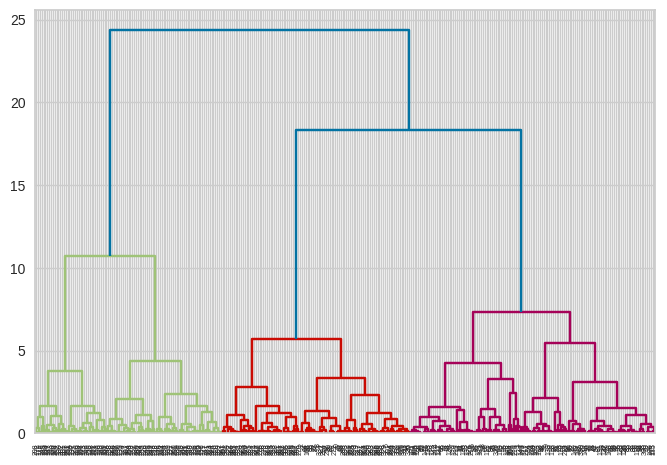

In [71]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.

plot_dendrogram(clustering)

In [72]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
data_with_clusters['Agg_clusters'] = clustering.fit_predict(X)
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,alm2,mcg,Clusters,Agg_clusters
0,-0.716084,-0.051761,1,0
1,-0.285665,-2.212876,1,0
2,-0.190016,0.308424,1,0
3,-0.668259,0.462790,1,0
4,-0.716084,-1.389594,1,0
...,...,...,...,...
331,-0.955205,1.234617,1,0
332,-0.859557,1.080251,1,0
333,-0.572611,0.565700,1,0
334,-0.620435,0.462790,1,0


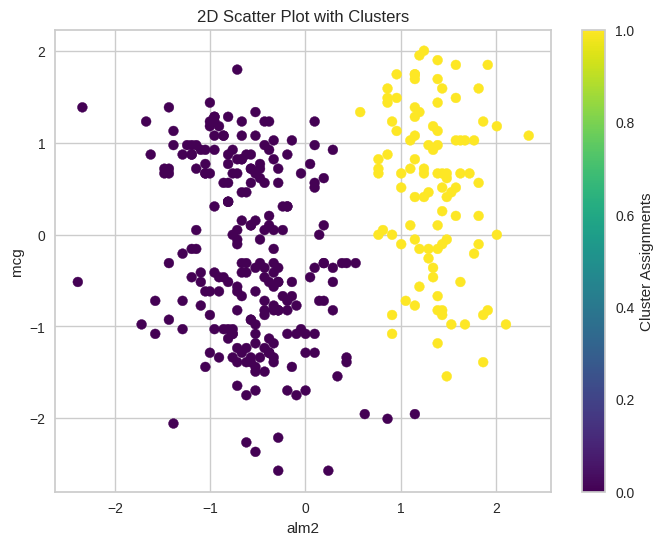

In [73]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.

# Extracting features and cluster assignments
alm2_values = data_with_clusters['alm2']
mcg_values = data_with_clusters['mcg']
cluster_assignment = data_with_clusters['Agg_clusters']

# Create a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(alm2_values, mcg_values, c=cluster_assignment, cmap='viridis', s=50)

# Adding labels to the axes
plt.xlabel('alm2')
plt.ylabel('mcg')
plt.title('2D Scatter Plot with Clusters')

# Adding a color bar to represent cluster assignments
color_bar = plt.colorbar()
color_bar.set_label('Cluster Assignments')

# Show the plot
plt.show()


# **Latihan Soal Teoritis** [30]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

**JAWABAN**

## 1

Cluster yang terbentuk oleh KMeans terlihat memiliki bentuk yang relatif mirip. KMeans terlihat mengikuti bentuk sesuai dengan persebaran data.

## 2
**Agglomerative Clustering**. Agglomerative Clustering adalah cara clustering yang dimulai dengan setiap titik sebagai satu cluster. Cluster yang paling mirip secara berpasangan digabungkan hingga tersisa satu clister

**Gaussian Mixture Model**. GMM mengasumsikan data dihasilkan dari campuran distribusi Gaussian. Mencari parameter distribusi Gaussian yang mungkin menghasilkan data. Setiap titik memiliki probabilitas untuk termasuk dalam setiap cluster, dan cluster dihasilkan berdasarkan distribusi probabilitas ini.

**Mean Shift**. Mean Shift mencari pusat data dan menggesernya ke wilayah dengan lebih banyak data. Sifatnya iteratif, titik-titik diperbarui dengan mean dari tetangga dalam radius tertentu. Konvergen ketika pusat persebaran tidak berubah secara signifikan.

**DBSCAN**. DBSCAN menemukan clustering berdasarkan data density. Titik-titik dengan banyak tetangga dalam radius tertentu dianggap satu cluster. Titik-titik yang tidak termasuk dalam cluster tetapi dekat dengan cluster dianggap sebagai noise.

## 3

**Silhouette Score** mengukur seberapa baik objek-data yang berada dalam satu cluster dibandingkan dengan cluster lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1. Nilai yang tinggi menunjukkan bahwa objek-data dalam satu cluster berada dekat satu sama lain dan jauh dari cluster lainnya.

**Davies-Bouldin Index** mengukur seberapa baik cluster telah dipisahkan satu sama lain. Semakin rendah nilai indeks ini, semakin baik clusteringnya. Index ini mencoba meminimalkan rasio antara jarak intra-cluster dan jarak inter-cluster.

**Calinski-Harabasz** Index mengukur seberapa baik cluster telah dipisahkan satu sama lain dengan membandingkan dispersi intra-cluster dengan dispersi inter-cluster. Nilai yang lebih tinggi menunjukkan hasil clustering yang lebih baik.



## 4

**Intra-cluster similarity** mengukur seberapa serupa objek-objek data dalam suatu cluster. Terdapat beberapa metode yang dapat digunakan untuk menghitung intra-cluster similarity, salah satunya adalah menggunakan rata-rata jarak atau rata-rata kedekatan antara objek-objek dalam suatu cluster. Berikut adalah cara umum untuk menghitung intra-cluster similarity: Average Linkage

1.   Hitung jarak antara setiap pasangan objek dalam suatu cluster
2.   Ambil rata-rata dari semua jarak tersebut.
3. Semakin kecil nilai rata-rata jarak, semakin serupa objek-objek dalam cluster tersebut.


**Inter-cluster dissimilarity** mengukur seberapa berbeda dua cluster atau lebih satu sama lain. Salah satu metode yang umum digunakan adalah dengan menghitung jarak antara pusat-pusat cluster. Berikut adalah cara umum untuk menghitung inter-cluster dissimilarity: Centroid Linkage

1.   Tentukan pusat (centroid) dari setiap cluster.
2.   Hitung jarak antara pusat-pusat cluster.
3. Semakin besar nilai jarak antara pusat-pusat cluster, semakin berbeda dua cluster tersebut.

Suatu klaster dianggap baik jika objek-objek dalam klaster tersebut lebih dekat satu sama lain daripada dengan objek-objek dalam klaster lain. Selain itu, batas antara klaster seharusnya cukup jelas, sehingga interaksi antar-klaster lebih rendah. Oleh karena itu, evaluasi yang baik terhadap kedua aspek ini akan menghasilkan klaster yang kompak dan terpisah dengan baik.

## 5


Algoritma K-Means tidak baik diterapkan pada data yang tidak bersifat globular atau berbentuk seperti bola karena algoritma ini beroperasi berdasarkan asumsi bahwa klaster memiliki bentuk bulat dan ukuran yang seragam. K-Means mengukur jarak antara titik data dengan centroid cluster terdekat. Oleh karena itu, algoritma ini cenderung menghasilkan cluster dengan bentuk yang mirip dengan bola karena pusat massa cluster dihitung berdasarkan rata-rata data dalam cluster.

_Note: Untuk menjawab pertanyaan diatas, Anda dapat menambahkan beberapa text cell sesuai kebutuhan_